In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import csv
from tqdm import tqdm

In [2]:
# import data
df = pd.read_csv('00_df.csv', index_col=0)
pre_df = pd.read_csv('01_pre_df.csv', index_col=0)
interpoltaed_mv_df = pd.read_csv('02_interpoltaed_mv_df.csv', index_col=0)

In [3]:
df.shape   # (783926, 41)

(783926, 41)

In [4]:
pre_df.shape   # (783926, 37)

(783926, 37)

In [5]:
interpoltaed_mv_df.shape

(783926, 40)

In [6]:
# import list data

data_length_per_person = []
data_length_per_person_sum = []

with open('data_length_per_person.csv', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f)
    for para in rdr:
        for i in para:
            data_length_per_person.append(int(i))


with open('data_length_per_person_sum.csv', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f)
    for para in rdr:
        for i in para:
            data_length_per_person_sum.append(int(i))

In [7]:
len(data_length_per_person)   # 20169

20169

In [8]:
len(data_length_per_person_sum)   # 20169

20169

## interpoltaed_mv_df 기준 
논적으로 필요없는 데이터와 선형회귀로 결측치가 대치된 데이터만 사용해서 테스트

In [9]:
interpoltaed_mv_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,101.6,91.5,36.80,126.8,87.30,NaN,24.8,20.7,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,36.80,98.0,75.33,NaN,19.0,20.7,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,36.80,122.0,86.00,NaN,22.0,20.7,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,36.80,126.8,87.30,NaN,30.0,24.0,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,36.80,122.0,91.33,NaN,24.5,20.7,46.5,0.28,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,88.0,98.0,38.10,135.0,81.00,64.0,16.0,0.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,31,1
783922,96.0,98.0,38.72,174.0,97.00,72.0,16.0,2.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,32,1
783923,140.0,97.0,38.10,133.0,81.50,62.5,16.0,0.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,33,1
783924,120.0,96.0,38.10,154.0,118.00,105.0,16.0,0.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,34,1


In [10]:
cols = interpoltaed_mv_df.columns
cols

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total',
       'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets',
       'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS',
       'SepsisLabel'],
      dtype='object')

In [11]:
interpoltaed_mv_df.drop(['Unit1', 'Unit2', 'HospAdmTime', 'ICULOS'], axis=1, inplace=True)

In [12]:
interpoltaed_mv_df.shape

(783926, 36)

In [13]:
cols = interpoltaed_mv_df.columns
len(cols)

36

## 환자별 20 row data를 추출
20 row가 되지 않는다면 drop / 20 이상의 row를 가지고 있다면 뒤쪽 데이터부터 20을 추출

In [14]:
len(data_length_per_person_sum)

20169

In [15]:
data_length_per_person_sum.insert(0,0)

In [16]:
len(data_length_per_person_sum)

20170

In [17]:
s_i = 0
e_i = 1

data_per_patient_for_20 = pd.DataFrame(columns = cols)
for i in tqdm(range(len(data_length_per_person_sum)-1)):
    s = data_length_per_person_sum[s_i]
    e = data_length_per_person_sum[e_i]
    if e - s >= 20:
        temp = interpoltaed_mv_df[e-20:e]
        data_per_patient_for_20 = pd.concat([data_per_patient_for_20, temp])
    
    s_i += 1
    e_i += 1

100%|██████████| 20169/20169 [05:52<00:00, 57.19it/s]


In [18]:
data_per_patient_for_20

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,SepsisLabel
34,102.0,91.5,36.80,103.0,75.67,NaN,24.0,20.7,46.5,0.3,...,NaN,36.7,12.3,NaN,10.2,NaN,327.5,83.14,0,0
35,99.0,89.0,37.11,113.0,96.33,NaN,26.0,20.7,46.5,0.3,...,NaN,36.7,12.3,NaN,10.2,NaN,327.5,83.14,0,0
36,97.0,89.0,36.80,110.0,72.00,NaN,29.0,20.7,46.5,0.3,...,NaN,36.7,12.3,NaN,10.2,NaN,327.5,83.14,0,0
37,110.0,89.0,36.80,108.0,90.67,NaN,24.0,20.7,46.5,0.3,...,NaN,36.7,12.3,NaN,10.2,NaN,327.5,83.14,0,0
38,108.0,89.0,36.80,139.0,102.33,NaN,26.0,20.0,46.5,0.3,...,NaN,36.7,12.3,NaN,10.2,NaN,327.5,83.14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,88.0,98.0,38.10,135.0,81.00,64.0,16.0,0.0,25.7,0.5,...,NaN,31.2,11.6,29.8,14.0,NaN,325.5,62.29,1,1
783922,96.0,98.0,38.72,174.0,97.00,72.0,16.0,2.0,25.7,0.5,...,NaN,27.8,11.6,29.8,14.0,NaN,325.5,62.29,1,1
783923,140.0,97.0,38.10,133.0,81.50,62.5,16.0,0.0,25.7,0.5,...,NaN,31.2,11.6,29.8,14.0,NaN,325.5,62.29,1,1
783924,120.0,96.0,38.10,154.0,118.00,105.0,16.0,0.0,25.7,0.5,...,NaN,31.2,11.6,29.8,14.0,NaN,325.5,62.29,1,1


In [19]:
people = int(data_per_patient_for_20.shape[0]/20)
people

17585

In [20]:
diff = (len(data_length_per_person_sum)-1) - data_per_patient_for_20.shape[0]/20
loss = round(diff/(len(data_length_per_person_sum)-1)*100, 1)

print(f'20행 미만의 데이터 수 : {diff}, 손실율: {loss})')

20행 미만의 데이터 수 : 2584.0, 손실율: 12.8)


# 스케일링(정규화)

라벨값 분리

In [21]:
label = data_per_patient_for_20["SepsisLabel"]
label

34        0
35        0
36        0
37        0
38        0
         ..
783921    1
783922    1
783923    1
783924    1
783925    1
Name: SepsisLabel, Length: 351700, dtype: object

정규 분포 혹은 minmax스캐일링 진행

In [22]:
# 정규 분포
data_per_patient_for_20 = (data_per_patient_for_20 - data_per_patient_for_20.mean())/data_per_patient_for_20.std()
data_per_patient_for_20.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,SepsisLabel
34,1.066961,-1.862253,-0.239035,-0.880981,-0.211372,NaN,0.974005,5.581491,5.647835,-1.315663,...,NaN,1.131153,0.975539,NaN,-0.238756,NaN,1.110786,1.255027,-1.173589,-0.18765
35,0.883750,-2.714666,0.277930,-0.400239,1.200863,NaN,1.358281,5.581491,5.647835,-1.315663,...,NaN,1.131153,0.975539,NaN,-0.238756,NaN,1.110786,1.255027,-1.173589,-0.18765
36,0.761609,-2.714666,-0.239035,-0.544461,-0.462239,NaN,1.934695,5.581491,5.647835,-1.315663,...,NaN,1.131153,0.975539,NaN,-0.238756,NaN,1.110786,1.255027,-1.173589,-0.18765
37,1.555525,-2.714666,-0.239035,-0.640610,0.813968,NaN,0.974005,5.581491,5.647835,-1.315663,...,NaN,1.131153,0.975539,NaN,-0.238756,NaN,1.110786,1.255027,-1.173589,-0.18765
38,1.433384,-2.714666,-0.239035,0.849690,1.611000,NaN,1.358281,5.394760,5.647835,-1.315663,...,NaN,1.131153,0.975539,NaN,-0.238756,NaN,1.110786,1.255027,-1.173589,-0.18765


In [23]:
# minmax 스켈일링
# normalized_df=(df-df.min())/(df.max()-df.min())

라벨값 재부착

In [24]:
data_per_patient_for_20["SepsisLabel"] = label

In [25]:
data_per_patient_for_20

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,SepsisLabel
34,1.066961,-1.862253,-0.239035,-0.880981,-0.211372,NaN,0.974005,5.581491,5.647835,-1.315663,...,NaN,1.131153,0.975539,NaN,-0.238756,NaN,1.110786,1.255027,-1.173589,0
35,0.883750,-2.714666,0.277930,-0.400239,1.200863,NaN,1.358281,5.581491,5.647835,-1.315663,...,NaN,1.131153,0.975539,NaN,-0.238756,NaN,1.110786,1.255027,-1.173589,0
36,0.761609,-2.714666,-0.239035,-0.544461,-0.462239,NaN,1.934695,5.581491,5.647835,-1.315663,...,NaN,1.131153,0.975539,NaN,-0.238756,NaN,1.110786,1.255027,-1.173589,0
37,1.555525,-2.714666,-0.239035,-0.640610,0.813968,NaN,0.974005,5.581491,5.647835,-1.315663,...,NaN,1.131153,0.975539,NaN,-0.238756,NaN,1.110786,1.255027,-1.173589,0
38,1.433384,-2.714666,-0.239035,0.849690,1.611000,NaN,1.358281,5.394760,5.647835,-1.315663,...,NaN,1.131153,0.975539,NaN,-0.238756,NaN,1.110786,1.255027,-1.173589,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,0.211975,0.354021,1.928884,0.657393,0.152965,0.298209,-0.563099,0.059607,0.310561,-0.181486,...,NaN,-0.067349,0.544034,-0.404244,0.348151,NaN,1.091695,-0.036595,0.852085,1
783922,0.700538,0.354021,2.962814,2.532286,1.246662,0.945965,-0.563099,0.593123,0.310561,-0.181486,...,NaN,-0.808241,0.544034,-0.404244,0.348151,NaN,1.091695,-0.036595,0.852085,1
783923,3.387639,0.013056,1.928884,0.561245,0.187143,0.176754,-0.563099,0.059607,0.310561,-0.181486,...,NaN,-0.067349,0.544034,-0.404244,0.348151,NaN,1.091695,-0.036595,0.852085,1
783924,2.166230,-0.327910,1.928884,1.570802,2.682139,3.617961,-0.563099,0.059607,0.310561,-0.181486,...,NaN,-0.067349,0.544034,-0.404244,0.348151,NaN,1.091695,-0.036595,0.852085,1


### sepsis vs non_sepsis 추출

In [26]:
# sepsis와 non sepsis 구분

s = 0
e = 20

sepsis_df = pd.DataFrame(columns=cols)
non_sepsis_df = pd.DataFrame(columns=cols)

for _ in tqdm(range(people)):
    if data_per_patient_for_20[s:e]['SepsisLabel'].sum() >= 1:
        data = data_per_patient_for_20[s:e]
        sepsis_df = pd.concat([sepsis_df, data])
    else: 
        data = data_per_patient_for_20[s:e]
        non_sepsis_df = pd.concat([non_sepsis_df, data])
        
    s += 20
    e += 20

100%|██████████| 17585/17585 [05:12<00:00, 56.36it/s]


In [27]:
sepsis_df.shape

(24700, 36)

In [28]:
non_sepsis_df.shape

(327000, 36)

## 3시간의 데이터를 보고 6시간 후의 패혈증 발병 정도를 예측
### label 우선 추출
1환자당 12개의 데이터 추출가능

In [29]:
e = 20

s_label = []
for i in tqdm(range(int(sepsis_df.shape[0]/20))):
    temp = sepsis_df["SepsisLabel"][e-12:e]
    s_label.append(list(temp))
    
    e += 20

100%|██████████| 1235/1235 [00:00<00:00, 28138.83it/s]


In [30]:
e = 20

ns_label = []
for i in tqdm(range(int(non_sepsis_df.shape[0]/20))):
    temp = non_sepsis_df["SepsisLabel"][e-12:e]
    ns_label.append(list(temp))
    
    e += 20

100%|██████████| 16350/16350 [00:00<00:00, 26482.74it/s]


### 훈련, 검증, 테스트 세트 구성
sepsis와 non_sepsis 데이터의 비율을 고려하지 않고 모든 데이터를 활용

In [31]:
sepsis_df_no_label = sepsis_df.drop(['SepsisLabel'], axis=1)
sepsis_df_no_label.shape

(24700, 35)

In [32]:
non_sepsis_df_no_label = non_sepsis_df.drop(['SepsisLabel'], axis=1)
non_sepsis_df_no_label.shape

(327000, 35)

### 환자 별로 구성하여 선형회귀법으로 결측치를 대치하고 남은 결측치는 현 상태의 평균대치법으로 적용

In [33]:
cols = sepsis_df_no_label.columns

In [34]:
# # 전체 평균

# total_mean = []

# for col in cols:
#     total_mean.append(round(sepsis_df_no_label[col].mean(), 1))

# len(total_mean)

In [35]:
# 환자 별 평균
person_mean = []

s_i = 0
e_i = 20

for _ in tqdm(range(int(sepsis_df_no_label.shape[0]/20))):
    temp = []
    for col in cols:
        temp.append(sepsis_df_no_label[col][s_i:e_i].mean())
    person_mean.append(temp)
    
    s_i += 20
    e_i += 20
    
len(person_mean)

100%|██████████| 1235/1235 [00:02<00:00, 411.83it/s]


1235

### 환자별 평균 값으로 column을 채워도 결측인 값은 0으로 대치 / 이후 전체 평균으로 대치하는 방법도 시도

In [36]:
# 환자별 평균을 정리한 리스트에 결측값을 0으로 변환

for i in tqdm(range(len(person_mean))):
    for j in range(len(person_mean[i])):
        if str(person_mean[i][j]) == "nan":
            person_mean[i][j] = 0
        else:
            person_mean[i][j] = round(person_mean[i][j], 1)

100%|██████████| 1235/1235 [00:00<00:00, 16577.11it/s]


In [37]:
# DP 생성 후 결측치 없는 데이터 세트 구성

sepsis_df_no_label_mv = pd.DataFrame(columns = cols)

s_i = 0
e_i = 20

for i in tqdm(range(int(sepsis_df_no_label.shape[0]/20))):
    temp = pd.DataFrame()
    for j, col in enumerate(cols):
        temp[col] = sepsis_df_no_label[col][s_i:e_i].fillna(person_mean[i][j])
        
    sepsis_df_no_label_mv = pd.concat([sepsis_df_no_label_mv, temp])
    s_i += 20
    e_i += 20

100%|██████████| 1235/1235 [00:20<00:00, 61.15it/s]


### 1환자 데이터(20개)를 3개씩 묶어서 x_train 세트 구성

In [38]:
def ratio(li):
    l = len(li)
    train = l*0.8
    val = train + int(l*0.1)
    return int(train), int(val)

In [39]:
tr, va = ratio(s_label)
print(tr, va)

988 1111


In [40]:
# sepsis 데이터 > x_train, x_val, x_test

s = 0
x_train = []
x_val = []
x_test = []

for _ in tqdm(range(int(sepsis_df_no_label_mv.shape[0]/20))):
    if _ < tr:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = sepsis_df_no_label_mv[s+i : s+i+3].values.tolist()
            x_train.append(temp)
    elif _ < va:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = sepsis_df_no_label_mv[s+i : s+i+3].values.tolist()
            x_val.append(temp)
    else: 
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = sepsis_df_no_label_mv[s+i : s+i+3].values.tolist()
            x_test.append(temp)
    s += 20

100%|██████████| 1235/1235 [00:05<00:00, 212.22it/s]


In [41]:
print(len(x_train)/12, len(x_val)/12, len(x_test)/12, len(x_train)//12 + len(x_val)//12 + len(x_test)//12)

988.0 123.0 124.0 1235


### non_sepsis_df 에도 동일하게 수행

In [42]:
# 환자 별 평균
person_mean = []

s_i = 0
e_i = 20

for _ in tqdm(range(int(non_sepsis_df_no_label.shape[0]/20))):
    temp = []
    for col in cols:
        temp.append(non_sepsis_df_no_label[col][s_i:e_i].mean())
    person_mean.append(temp)
    
    s_i += 20
    e_i += 20
    
len(person_mean)

100%|██████████| 16350/16350 [00:47<00:00, 346.27it/s]


16350

In [43]:
# 환자별 평균을 정리한 리스트에 결측값을 0으로 변환

for i in tqdm(range(len(person_mean))):
    for j in range(len(person_mean[i])):
        if str(person_mean[i][j]) == "nan":
            person_mean[i][j] = 0
        else:
            person_mean[i][j] = round(person_mean[i][j], 1)

100%|██████████| 16350/16350 [00:01<00:00, 16266.20it/s]


In [44]:
# DP 생성 후 결측치 없는 데이터 세트 구성

non_sepsis_df_no_label_mv = pd.DataFrame(columns = cols)

s_i = 0
e_i = 20

for i in tqdm(range(int(non_sepsis_df_no_label.shape[0]/20))):
    temp = pd.DataFrame()
    for j, col in enumerate(cols):
        temp[col] = non_sepsis_df_no_label[col][s_i:e_i].fillna(person_mean[i][j])
        
    non_sepsis_df_no_label_mv = pd.concat([non_sepsis_df_no_label_mv, temp])
    s_i += 20
    e_i += 20

100%|██████████| 16350/16350 [08:31<00:00, 31.97it/s]


In [45]:
# non_sepsis 데이터 > y_train, y_val, y_test

s = 0

for _ in tqdm(range(int(non_sepsis_df_no_label_mv.shape[0]/20))):
    if _ < tr:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = non_sepsis_df_no_label_mv[s+i : s+i+3].values.tolist()
            x_train.append(temp)
    elif _ < va:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = non_sepsis_df_no_label_mv[s+i : s+i+3].values.tolist()
            x_val.append(temp)
    elif _ < 1235:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = non_sepsis_df_no_label_mv[s+i : s+i+3].values.tolist()
            x_test.append(temp)
    else:
        break
    s += 20

  8%|▊         | 1235/16350 [00:05<01:01, 245.04it/s]


In [46]:
print(len(x_train)/12, len(x_val)/12, len(x_test)/12, len(x_train)//12 + len(x_val)//12 + len(x_test)//12)

1976.0 246.0 248.0 2470


In [47]:
print(len(x_train)/12, len(x_val)/12, len(x_test)/12, len(x_train)//12 + len(x_val)//12 + len(x_test)//12)

1976.0 246.0 248.0 2470


In [48]:
# sepsis label > train, val, test set 구성

y_train = []
y_val = []
y_test = []   # 988 123 124 1235

for _ in range(len(s_label)):
    if _ < tr:
        y_train += s_label[_]
    elif _ < va:
        y_val += s_label[_]
    elif _ < 1235:
        y_test += s_label[_]
    else:
        break

In [49]:
print(len(y_train)/12, len(y_val)/12, len(y_test)/12, len(y_train)//12 + len(y_val)//12 + len(y_test)//12)

988.0 123.0 124.0 1235


In [50]:
y_train += [0] * len(y_train)
y_val += [0] * len(y_val)
y_test += [0] * len(y_test)

In [51]:
print(len(y_train)/12, len(y_val)/12, len(y_test)/12, len(y_train)//12 + len(y_val)//12 + len(y_test)//12)

1976.0 246.0 248.0 2470


## 파이선 list로 되어있는 데이터 세트를 np.array로 변환

In [52]:
X_train = np.array(x_train)
X_train

array([[[ 2.96014568, -1.00983987,  1.09506886, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.20442755, -1.00983987,  1.09506886, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.26549802, -0.32790958,  3.98006871, ...,  0.4998645 ,
         -2.16575771,  0.85208461]],

       [[ 3.20442755, -1.00983987,  1.09506886, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.26549802, -0.32790958,  3.98006871, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.38763896, -0.32790958,  1.09506886, ...,  0.4998645 ,
         -2.16575771,  0.85208461]],

       [[ 3.26549802, -0.32790958,  3.98006871, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.38763896, -0.32790958,  1.09506886, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.08228661,  0.01305556,  2.87943293, ...,  0.4998645 ,
         -2.16575771,  0.85208461]],

       ...,

       [[ 0.5173269 ,  1.03595099,  0.09449088, ..., -0.163558 

In [53]:
X_train.shape

(23712, 3, 35)

In [54]:
X_val = np.array(x_val)
X_test = np.array(x_test)

Y_train = np.array(y_train)
Y_val = np.array(y_val)
Y_test = np.array(y_test)

# 데이터 세트 구성 완료
## 모델은 이전과 동일하게 구성

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [56]:
hidden_units = 128

model = Sequential()
model.add(LSTM(hidden_units, activation='relu', input_shape=(3, 35)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               83968     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 92,289
Trainable params: 92,289
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer='SGD', metrics=['accuracy'])

In [58]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.SGD(learning_rate=0.06), metrics=['accuracy'])

In [59]:
hist = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
741/741 [==============================] - 3s 3ms/step - loss: 0.6186 - accuracy: 0.6476 - val_loss: 0.6213 - val_accuracy: 0.6301
Epoch 2/10
741/741 [==============================] - 2s 3ms/step - loss: 0.5490 - accuracy: 0.7140 - val_loss: 0.6488 - val_accuracy: 0.6247
Epoch 3/10
741/741 [==============================] - 2s 3ms/step - loss: 0.5004 - accuracy: 0.7545 - val_loss: 0.6993 - val_accuracy: 0.6358
Epoch 4/10
741/741 [==============================] - 2s 3ms/step - loss: 0.4596 - accuracy: 0.7829 - val_loss: 0.7517 - val_accuracy: 0.6369
Epoch 5/10
741/741 [==============================] - 2s 3ms/step - loss: 0.4232 - accuracy: 0.8071 - val_loss: 0.7847 - val_accuracy: 0.6551
Epoch 6/10
741/741 [==============================] - 2s 3ms/step - loss: 0.3901 - accuracy: 0.8269 - val_loss: 0.8501 - val_accuracy: 0.6599
Epoch 7/10
741/741 [==============================] - 2s 3ms/step - loss: 0.3618 - accuracy: 0.8451 - val_loss: 0.9666 - val_accuracy: 0.6491
Epoch 

학습 안됨. 

1. 초기 데이터 세트(df)에서 선형회귀 방법으로 결측치를 대치하고 변화되지 않는 결측값은 0으로 처리.
2. sepsis와 non_sepsis군을 나누어 전처리를 진행하였고, 3시간의 데이터를 보고 6시간 후 sepsis 확률을 예측할 수 있는 모습으로 전처리
3. sepsis 데이터량이 non_sepsis에 비해 많이 적어 sepsis 양에 맞게 non_sepsis 데이터를 제한하여 train, val, test를 구성 
4. 기본적인 LSTM의 모델을 구성하여 학습을 진행
5. 학습 안됨

In [60]:
result = model.predict(X_test)
print('## result ##')

o = 0
x = 0

for y, r in zip(Y_test, result):
    if y == r:
        o += 1
    else:
        x += 1
    
print(o, x, o+x)

## result ##
0 2976 2976


In [61]:
print(o/(o+x), x/(o+x))

0.0 1.0


### 의문
>혹시 인풋은 3차원인데 아웃풋은 2차원이라서 그런가?

In [62]:
test = Y_train.reshape(-1, 1)
test

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [63]:
t_val = Y_val.reshape(-1, 1)

In [64]:
hist = model.fit(X_train, test, epochs=5, batch_size=128, validation_data=(X_val, t_val))

Epoch 1/5
186/186 [==============================] - 2s 6ms/step - loss: 0.2621 - accuracy: 0.8996 - val_loss: 1.1948 - val_accuracy: 0.6379
Epoch 2/5
186/186 [==============================] - 1s 5ms/step - loss: 0.2532 - accuracy: 0.9043 - val_loss: 1.2000 - val_accuracy: 0.6365
Epoch 3/5
186/186 [==============================] - 1s 5ms/step - loss: 0.2488 - accuracy: 0.9061 - val_loss: 1.2215 - val_accuracy: 0.6338
Epoch 4/5
186/186 [==============================] - 1s 6ms/step - loss: 0.2453 - accuracy: 0.9071 - val_loss: 1.2900 - val_accuracy: 0.6399
Epoch 5/5
186/186 [==============================] - 1s 5ms/step - loss: 0.2427 - accuracy: 0.9073 - val_loss: 1.2477 - val_accuracy: 0.6335


loss가 확인되지 않음.

### 의문
>혹시 shuffle이 안되어서 학습이 안될 수 도 있기 때문에 shuffle 진행 후 다시 시도

In [65]:
## Shuffle 기능 확인

# import numpy as np

# # x = np.arange(10).reshape(-1, 1)
# # print ("x: ", x)
# y = np.arange(10).reshape(-1, 1)
# # print ("y: ", y)

# x = np.array([[0,1], [1,2], [2,3], [3,4], [4,5], [5,6], [6,7], [7,8], [8,9], [9,10]])

# s = np.arange(x.shape[0])
# print('s', s)
# np.random.shuffle(s)

# x = x[s]
# print ("x: ", x)
# y = y[s]
# print ("y: ", y)

In [66]:
# Train, Test data 적용
i = np.arange(X_train.shape[0])
np.random.shuffle(i)

train = X_train[i]
test = Y_train[i]

In [67]:
# Val data 적용

i = np.arange(X_val.shape[0])
np.random.shuffle(i)

sx_val = X_val[i]
sy_val = Y_val[i]

In [68]:
hist = model.fit(train, test, epochs=5, batch_size=128, validation_data=(sx_val, sy_val))

Epoch 1/5
186/186 [==============================] - 2s 5ms/step - loss: 0.2391 - accuracy: 0.9094 - val_loss: 1.3541 - val_accuracy: 0.6389
Epoch 2/5
186/186 [==============================] - 1s 5ms/step - loss: 0.2366 - accuracy: 0.9101 - val_loss: 1.2787 - val_accuracy: 0.6243
Epoch 3/5
186/186 [==============================] - 1s 5ms/step - loss: 0.2333 - accuracy: 0.9112 - val_loss: 1.3402 - val_accuracy: 0.6294
Epoch 4/5
186/186 [==============================] - 1s 5ms/step - loss: 0.2301 - accuracy: 0.9119 - val_loss: 1.3751 - val_accuracy: 0.6314
Epoch 5/5
186/186 [==============================] - 1s 5ms/step - loss: 0.2280 - accuracy: 0.9143 - val_loss: 1.3398 - val_accuracy: 0.6311


변화 없음

### 의문
> 혹시 node가 너무 적어서 학습이 안되는지 확인

In [86]:
hidden_units = 512

model = Sequential()
model.add(LSTM(hidden_units, activation='relu', input_shape=(3, 35)))
model.add(LSTM(64, activation='relu', input_shape=(3, 35)))
model.add(Dense(1, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 3, 128)            83968     
                                                                 
 lstm_12 (LSTM)              (None, 3, 20)             11920     
                                                                 
 lstm_13 (LSTM)              (None, 3, 20)             3280      
                                                                 
 dense_10 (Dense)            (None, 3, 1)              21        
                                                                 
Total params: 99,189
Trainable params: 99,189
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
hist = model.fit(train, test, epochs=5, batch_size=128, validation_data=(sx_val, sy_val))

Epoch 1/5


ValueError: in user code:

    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None,) and (None, 3, 1) are incompatible


변화 없음

### 의문
> 혹시 epochs가 너무 적어서 학습이 안되는지 확인

In [72]:
hist = model.fit(train, test, epochs=20, batch_size=128, validation_data=(sx_val, sy_val))

Epoch 1/20
186/186 [==============================] - 8s 44ms/step - loss: 0.0000e+00 - accuracy: 0.4038 - val_loss: 0.0000e+00 - val_accuracy: 0.4028
Epoch 2/20
186/186 [==============================] - 7s 38ms/step - loss: 0.0000e+00 - accuracy: 0.4038 - val_loss: 0.0000e+00 - val_accuracy: 0.4028
Epoch 3/20
186/186 [==============================] - 7s 38ms/step - loss: 0.0000e+00 - accuracy: 0.4038 - val_loss: 0.0000e+00 - val_accuracy: 0.4028
Epoch 4/20
186/186 [==============================] - 7s 38ms/step - loss: 0.0000e+00 - accuracy: 0.4038 - val_loss: 0.0000e+00 - val_accuracy: 0.4028
Epoch 5/20
186/186 [==============================] - 7s 38ms/step - loss: 0.0000e+00 - accuracy: 0.4038 - val_loss: 0.0000e+00 - val_accuracy: 0.4028
Epoch 6/20
186/186 [==============================] - 7s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4038 - val_loss: 0.0000e+00 - val_accuracy: 0.4028
Epoch 7/20
186/186 [==============================] - 7s 38ms/step - loss: 0.0000e+00 - accura

변화 없음

## LSTM에 적합한 활성화 함수가 있음을 확인. tanh로 시도

In [93]:
hidden_units = 128

model = Sequential()
model.add(LSTM(hidden_units, activation='tanh', input_shape=(3, 35), return_sequences = True))
model.add(Dense(64, activation='relu'))
model.add(LSTM(20, return_sequences = True))
model.add(LSTM(20, return_sequences = True))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 3, 128)            83968     
                                                                 
 lstm_18 (LSTM)              (None, 3, 20)             11920     
                                                                 
 lstm_19 (LSTM)              (None, 3, 20)             3280      
                                                                 
 dropout_4 (Dropout)         (None, 3, 20)             0         
                                                                 
 dense_13 (Dense)            (None, 3, 1)              21        
                                                                 
Total params: 99,189
Trainable params: 99,189
Non-trainable params: 0
_________________________________________________________________


In [97]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=SGD, metrics=['accuracy'])

In [98]:
# callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

In [99]:
hist = model.fit(train, test, epochs=20, batch_size=32, validation_data=(sx_val, sy_val))

Epoch 1/20


ValueError: in user code:

    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\losses.py", line 1807, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\kjong\Anaconda3\envs\ai\lib\site-packages\keras\backend.py", line 5158, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((32, 3, 1) vs (32,)).


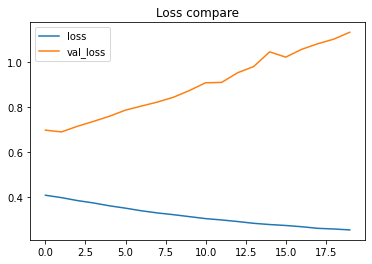

In [81]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss compare')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

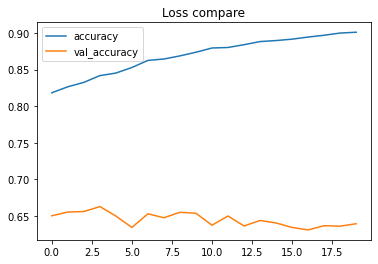

In [82]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Loss compare')
plt.legend(['accuracy','val_accuracy'], loc='upper left')
plt.show()

## GRU로 테스트 결과 LSTM 보다 성능이 낮게 나와 제외